In [1]:
import numpy as np
import control as ct
import sympy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [150]:
def symTransferFunction(eq):
    s = sp.var('s')
    used_symbols = [str(l) for l in eq.free_symbols]
    if not len(used_symbols) == 1 or not "s" in used_symbols:
        raise Exception("invalid equation, please use correct transfer function equation (e.g. 1/(s**2+3))")
    n, d = sp.fraction(eq)
    num = sp.Poly(sp.expand(n), s).all_coeffs()
    den = sp.Poly(sp.expand(d), s).all_coeffs()
    num = [float(v) for v in num]
    den = [float(v) for v in den]
    
    return ct.TransferFunction(num, den)

In [151]:
sp.Poly(1+3, s)

Poly(4, s, domain='ZZ')

In [152]:
s = sp.var("s")
symTransferFunction(10.0/s/(2*s+5))


    10
-----------
2 s^2 + 5 s

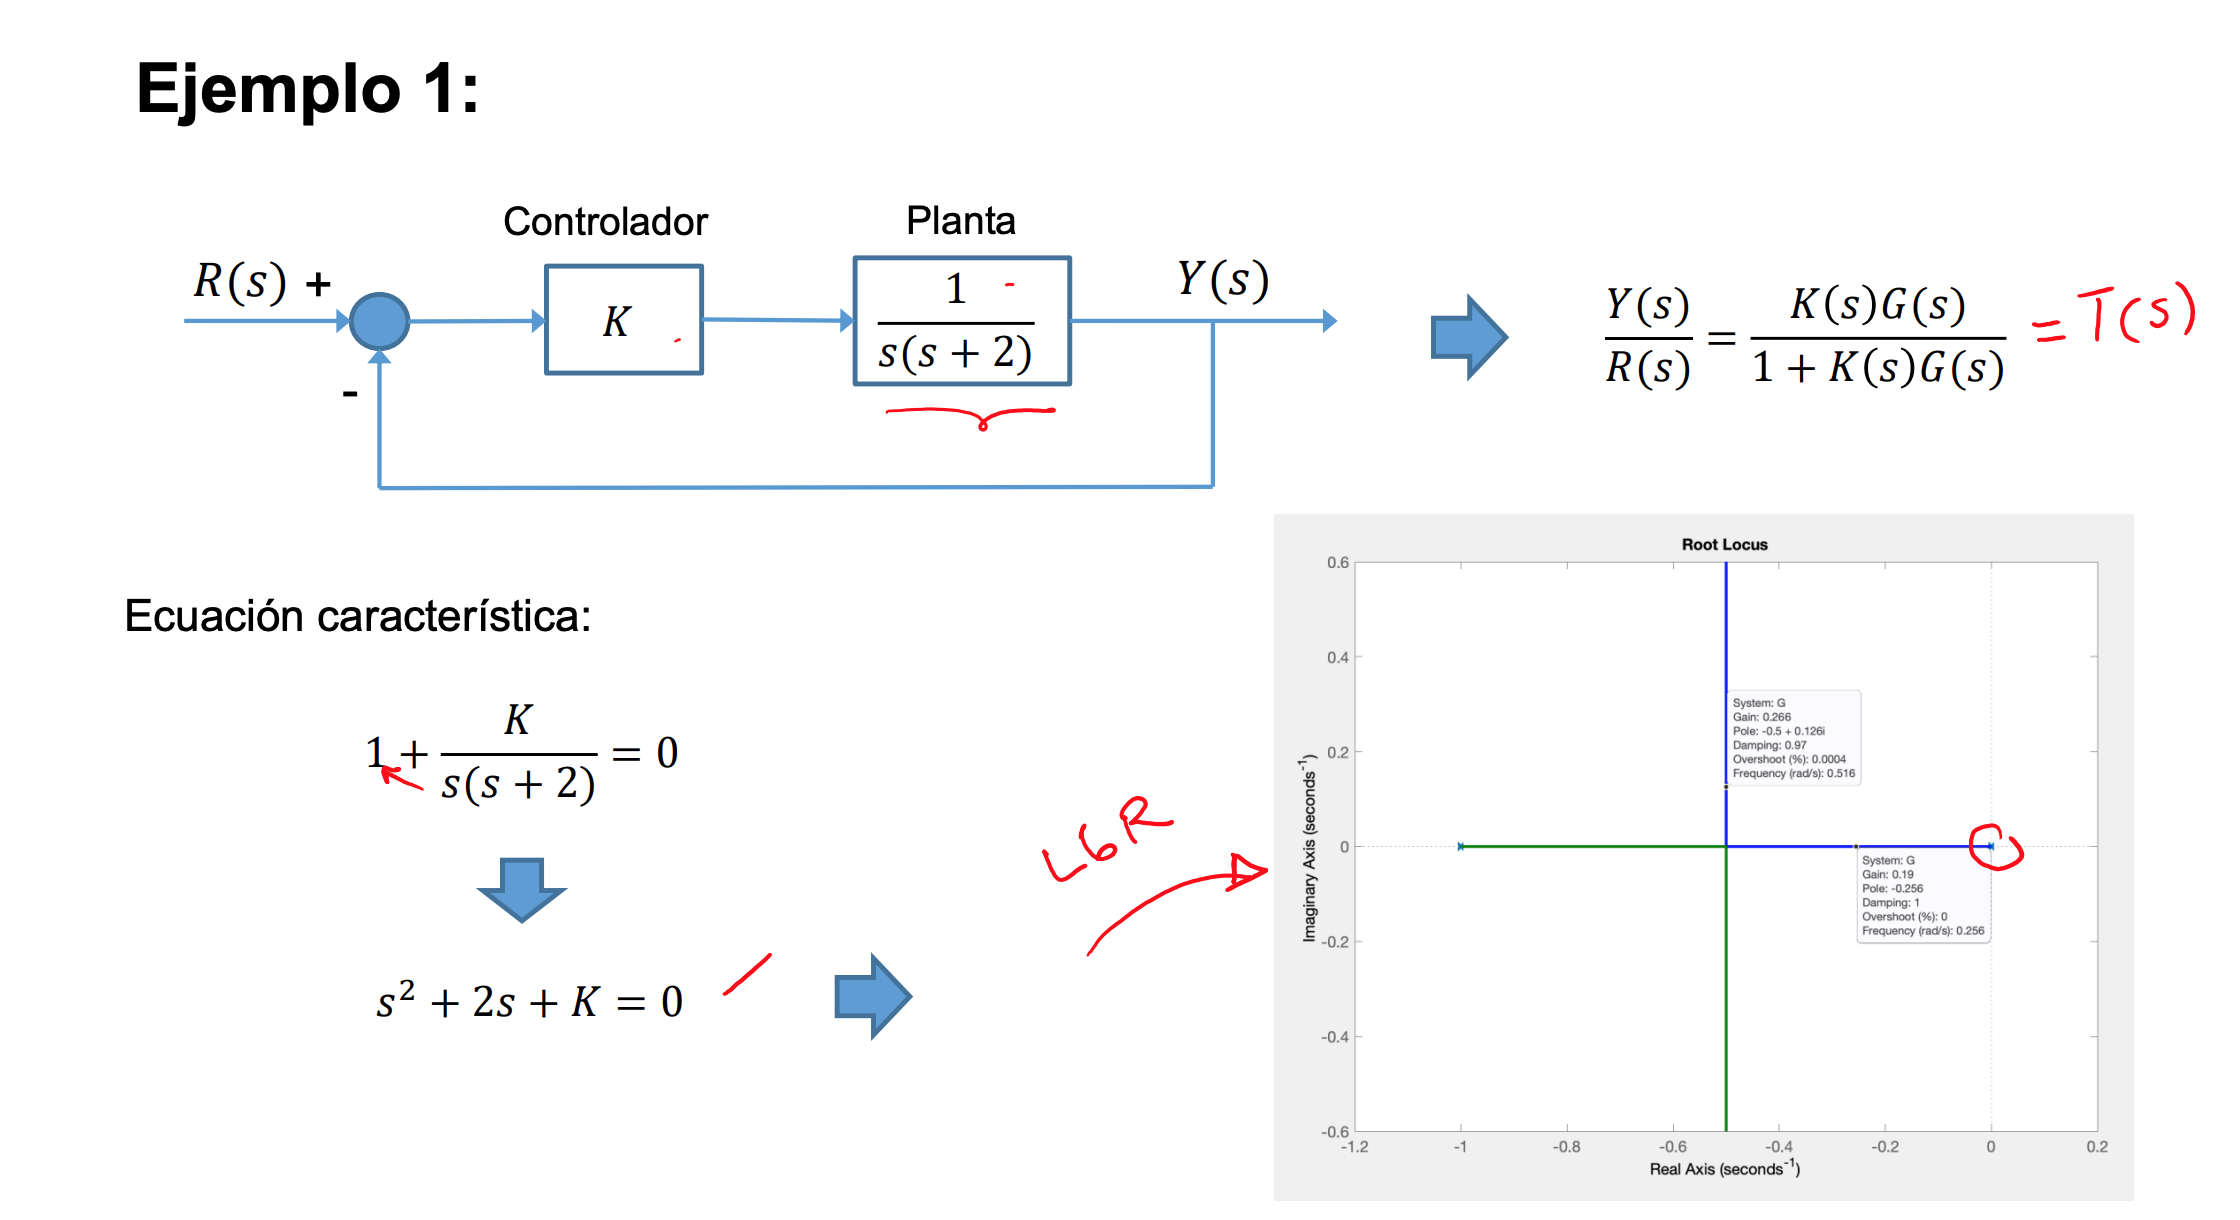

In [90]:
def extractCaracteristicEquation(K, G, H):
    num, _ = sp.fraction(sp.simplify(1 + K*G*H))
    return sp.expand(num) # == 0

In [281]:
eq = extractCaracteristicEquation(K, 1/s/(s+2), 1)
w = sp.var("w")
complex_eq = eq.subs(s, sp.I*w) # to complex frequency
# complex_eq = sp.Eq(complex_f, 0)
poles = sp.solve(complex_eq, w) # a.k.a roots
# [complex(poles[0].subs(K, k)) for k in np.arange(-10, 10, 0.1)]

In [289]:
def plot_root_locus(K, G, H, ki=-10, kf=10, points=100):
    eq = extractCaracteristicEquation(K, G, H)
    w = sp.var("w")
    
    complex_f = eq.subs(s, sp.I*w) # to complex frequency
    complex_eq = sp.Eq(complex_f, 0)

    poles = sp.solve(complex_eq, w) # a.k.a roots
    poles_points = [[complex(sp.N(p, chop=True).subs(K, k)) for k in np.linspace(ki, kf, points)] for p in poles]
    
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid()

    for pole in poles_points:
        # changing dimention
        p_pole = [(point.real, point.imag) for point in pole]
        xx, yy = [], []
        for point in p_pole:
            xx.append(float(point[0]))
            yy.append(float(point[1]))

        plt.plot(xx, yy)

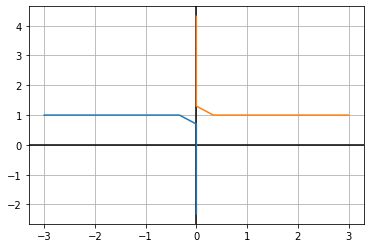

In [290]:
plot_root_locus(K, 1/s/(s+2), 1)

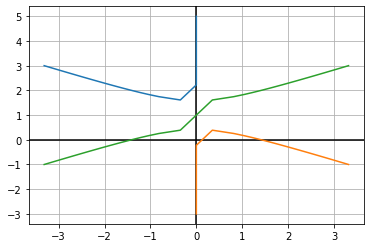

In [247]:
plot_root_locus(K, 1/s/(s+1)/(s+2), 1, ki=-60, kf=60, points=100)

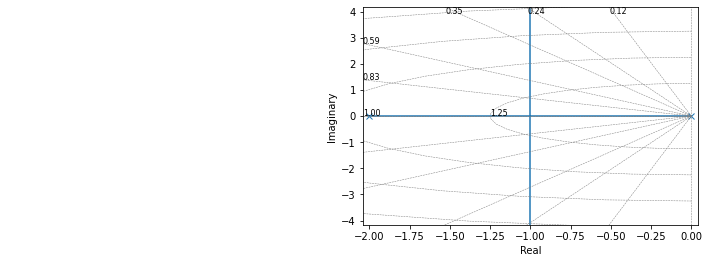

In [257]:
tf = symTransferFunction(1/s/(s+2))
ct.rlocus(tf);